# Test all models

In [6]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, matthews_corrcoef, confusion_matrix
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def load_model_and_tokenizer(model_path, model_name):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokenizer.save_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model.to(device)
    return tokenizer, model

def preprocess_data(tokenizer, dataset_path):
    data = pd.read_csv(dataset_path)
    comments = data['comment'].astype(str).tolist()  # Ensure all comments are strings
    labels = torch.tensor(data['isToxic'].tolist()).float()
    encodings = tokenizer(comments, truncation=True, padding=True, max_length=128, return_tensors='pt')
    dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], labels)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)
    return dataloader, labels

def evaluate_model(dataloader, model):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits.squeeze()
            predictions = torch.sigmoid(logits).detach().cpu().numpy()
            predictions = (predictions > 0.5).astype(int)

            all_predictions.extend(predictions)
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = accuracy_score(all_labels, all_predictions)
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    mcc = matthews_corrcoef(all_labels, all_predictions)
    class_report = classification_report(all_labels, all_predictions, target_names=['Non-Toxic', 'Toxic'])
    cm = confusion_matrix(all_labels, all_predictions)

    return accuracy, f1, precision, recall, mcc, class_report, cm

dataset_path = './Datasets/Dataset_Maltese/test/test.csv'

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# With StopWords

In [5]:
models1 = [
    ('BERT', './models/Experiments/Validation/Experiment-1/BERT_ENG', 'bert-base-uncased'),
    ('XLMR', './models/Experiments/Validation/Experiment-1/XLM-R_ENG', 'xlm-roberta-base'),
    ('RoBERTa' , './models/Experiments/Validation/Experiment-1/RoBERTa_ENG' , 'FacebookAI/roberta-base'),
    ('mBERTu' , './models/Experiments/Validation/Experiment-1/mBERTu_ENG' , 'MLRS/mBERTu'),
    ('BERT_FT', './models/Experiments/Validation/Experiment-2/BERT_FT', 'bert-base-uncased'),
    ('XLMR_FT', './models/Experiments/Validation/Experiment-2/XLM-R_FT', 'xlm-roberta-base'),
    ('RoBERTa_FT' , './models/Experiments/Validation/Experiment-2/RoBERTa_FT' , 'FacebookAI/roberta-base'),
    ('mBERTu_FT', './models/Experiments/Validation/Experiment-2/mBERTu_FT', 'MLRS/mBERTu'),
]

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


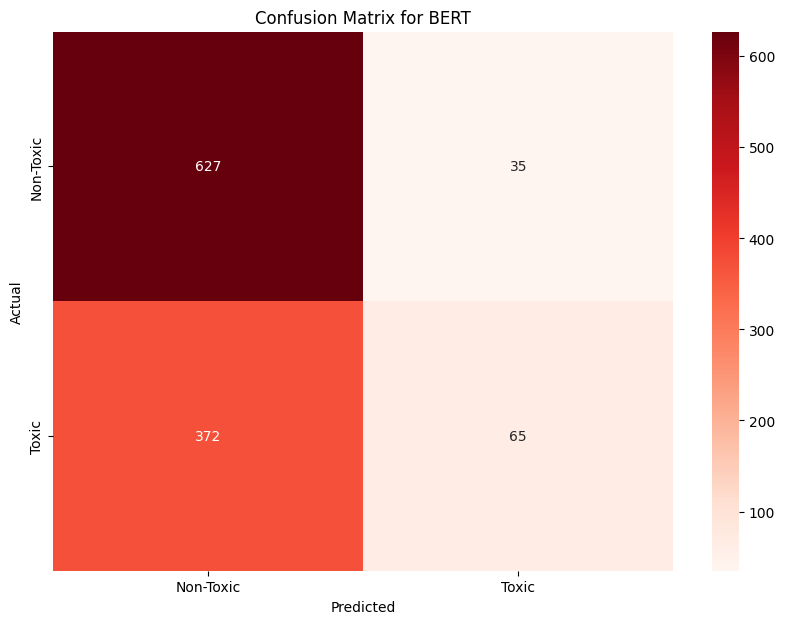

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


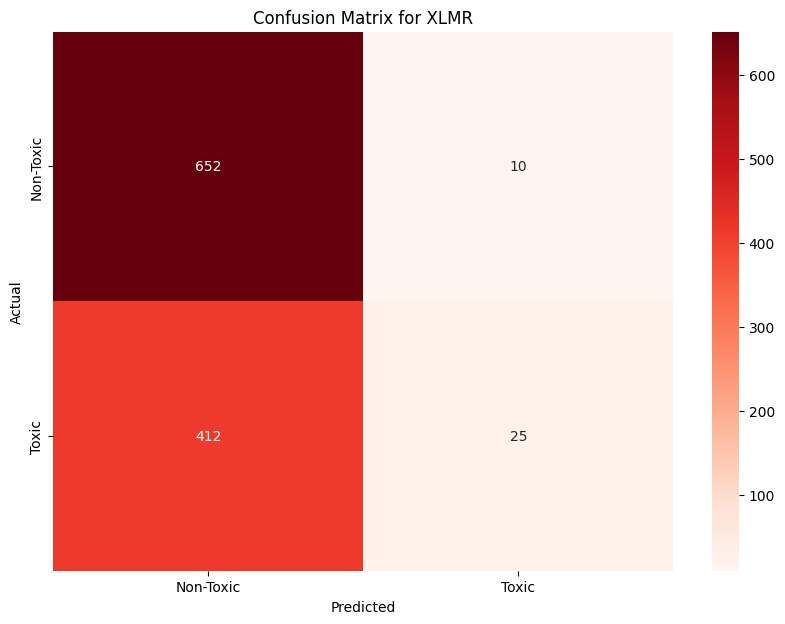

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


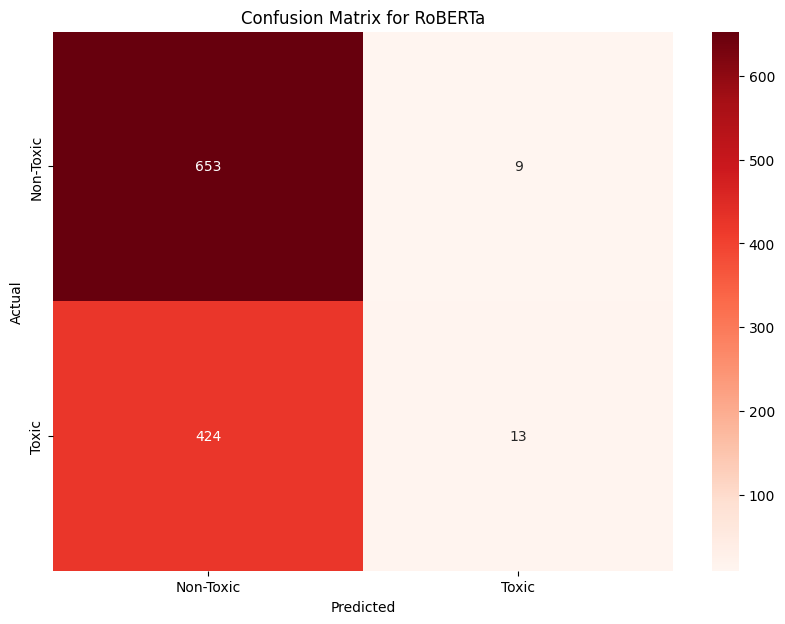

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


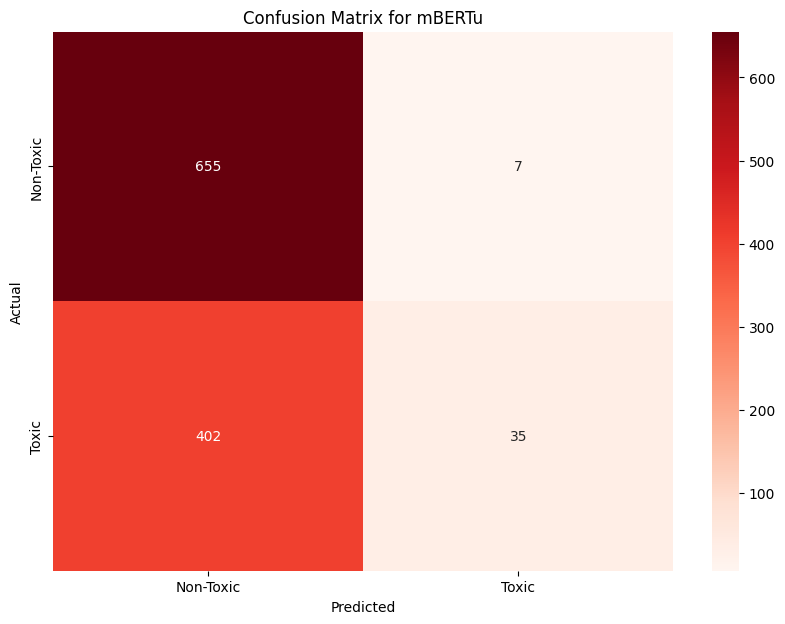

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


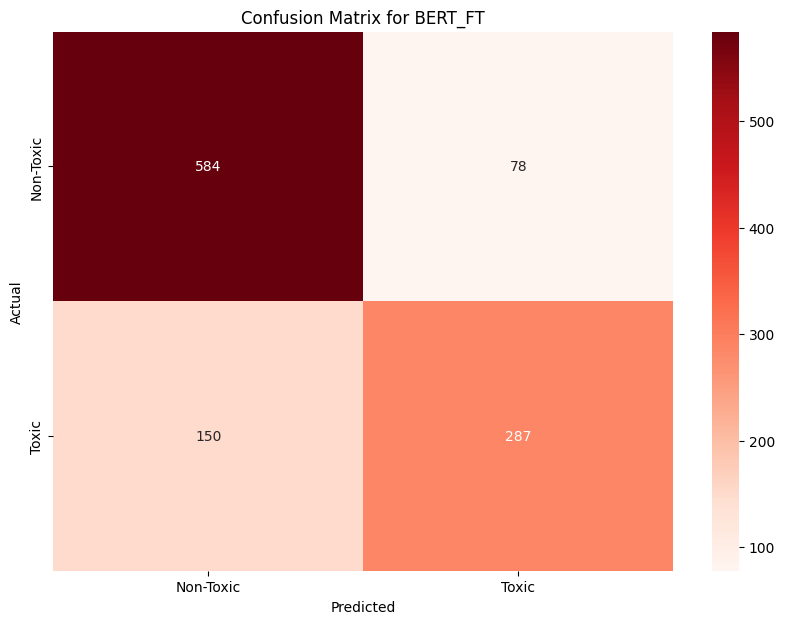

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


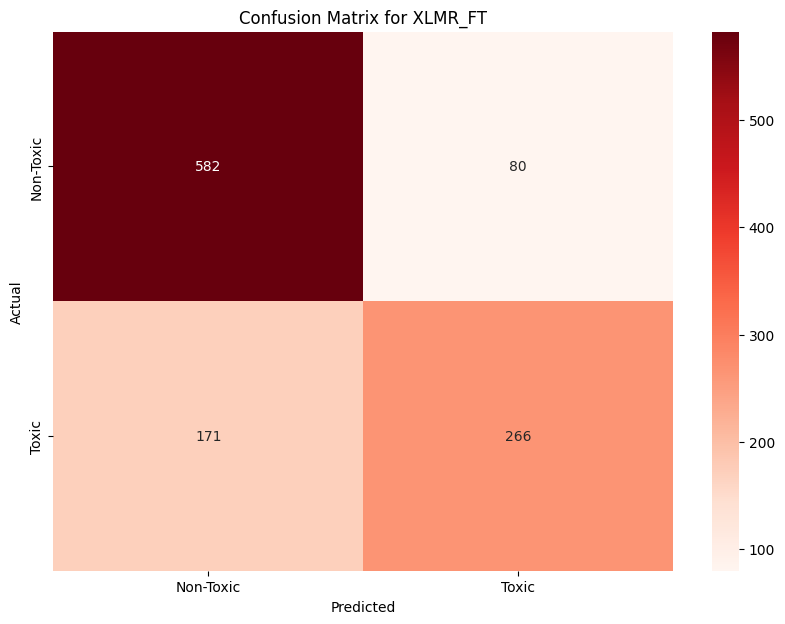

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


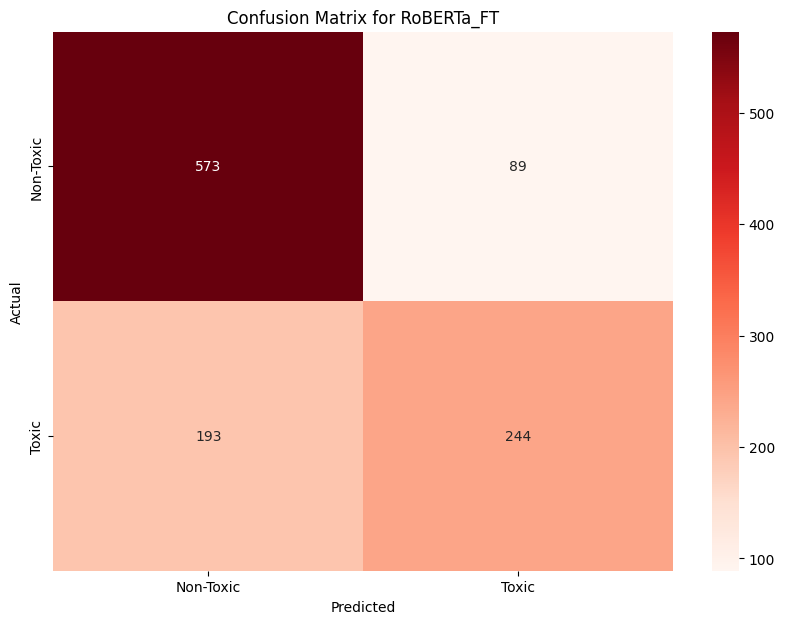

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


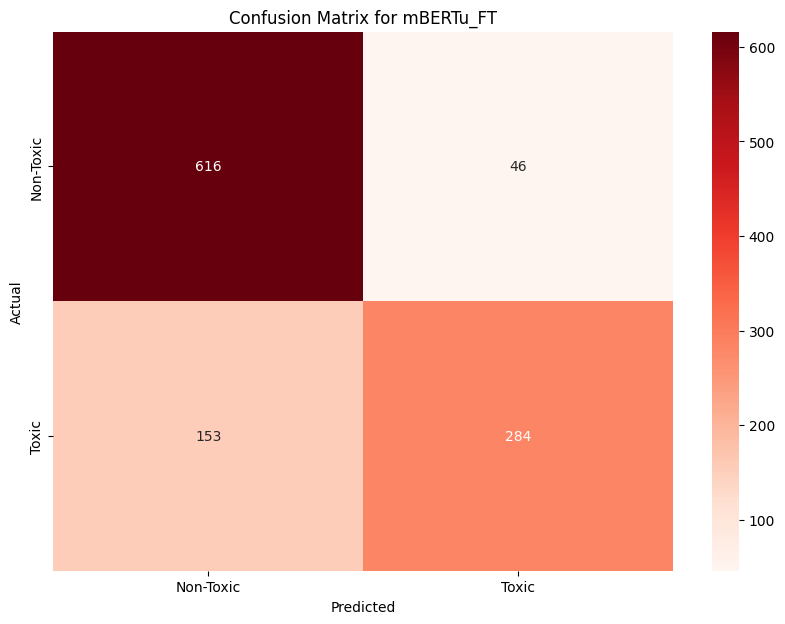

,Model,Accuracy,F1 Score,Precision,Recall,MCC
0,BERT,0.63,0.55,0.64,0.63,0.16
1,XLMR,0.62,0.50,0.65,0.62,0.12
2,RoBERTa,0.61,0.47,0.60,0.61,0.06
3,mBERTu,0.63,0.52,0.70,0.63,0.18
4,BERT_FT,0.79,0.79,0.79,0.79,0.56
5,XLMR_FT,0.77,0.77,0.77,0.77,0.51
6,RoBERTa_FT,0.74,0.74,0.74,0.74,0.45
7,mBERTu_FT,0.82,0.81,0.82,0.82,0.62


Model: BERT
Accuracy: 0.63
F1 Score: 0.55
Precision: 0.64
Recall: 0.63
MCC: 0.16

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.63      0.95      0.75       662
       Toxic       0.65      0.15      0.24       437

    accuracy                           0.63      1099
   macro avg       0.64      0.55      0.50      1099
weighted avg       0.64      0.63      0.55      1099



Model: XLMR
Accuracy: 0.62
F1 Score: 0.50
Precision: 0.65
Recall: 0.62
MCC: 0.12

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.61      0.98      0.76       662
       Toxic       0.71      0.06      0.11       437

    accuracy                           0.62      1099
   macro avg       0.66      0.52      0.43      1099
weighted avg       0.65      0.62      0.50      1099



Model: RoBERTa
Accuracy: 0.61
F1 Score: 0.47
Precision: 0.60
Recall: 0.61
MCC: 0.06

Classification Report:
               precisi

In [4]:
results = []

for model_name, model_path, model_base in models1:
    tokenizer, model = load_model_and_tokenizer(model_path, model_base)
    dataloader, labels = preprocess_data(tokenizer, dataset_path)
    accuracy, f1, precision, recall, mcc, class_report, cm = evaluate_model(dataloader, model)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Classification Report': class_report,
        'Confusion Matrix': cm
    })

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def custom_round(value):
    rounded_value = round(value, 2)
    return rounded_value
    
# Round the values in the results list
for result in results:
    result['Accuracy'] = custom_round(result['Accuracy'])
    result['F1 Score'] = custom_round(result['F1 Score'])
    result['Precision'] = custom_round(result['Precision'])
    result['Recall'] = custom_round(result['Recall'])
    result['MCC'] = custom_round(result['MCC'])

# Display results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'MCC'])
display(df_results)

# Print detailed classification reports for each model
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"MCC: {result['MCC']:.2f}")
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n" + "="*60 + "\n")
results = []

# Without Stop Words

In [8]:
models1 = [
    ('BERT', './models/Experiments/Validation/Experiment-1/BERT_ENG', 'bert-base-uncased'),
    ('XLMR', './models/Experiments/Validation/Experiment-1/XLM-R_ENG', 'xlm-roberta-base'),
    ('RoBERTa' , './models/Experiments/Validation/Experiment-1/RoBERTa_ENG' , 'FacebookAI/roberta-base'),
    ('mBERTu' , './models/Experiments/Validation/Experiment-1/mBERTu_ENG' , 'MLRS/mBERTu'),
    ('BERT_FT', './models/Experiments/Validation/Experiment-2/BERT_FT', 'bert-base-uncased'),
    ('XLMR_FT', './models/Experiments/Validation/Experiment-2/XLM-R_FT', 'xlm-roberta-base'),
    ('RoBERTa_FT' , './models/Experiments/Validation/Experiment-2/RoBERTa_FT' , 'FacebookAI/roberta-base'),
    ('mBERTu_FT', './models/Experiments/Validation/Experiment-2/mBERTu_FT', 'MLRS/mBERTu'),
]

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


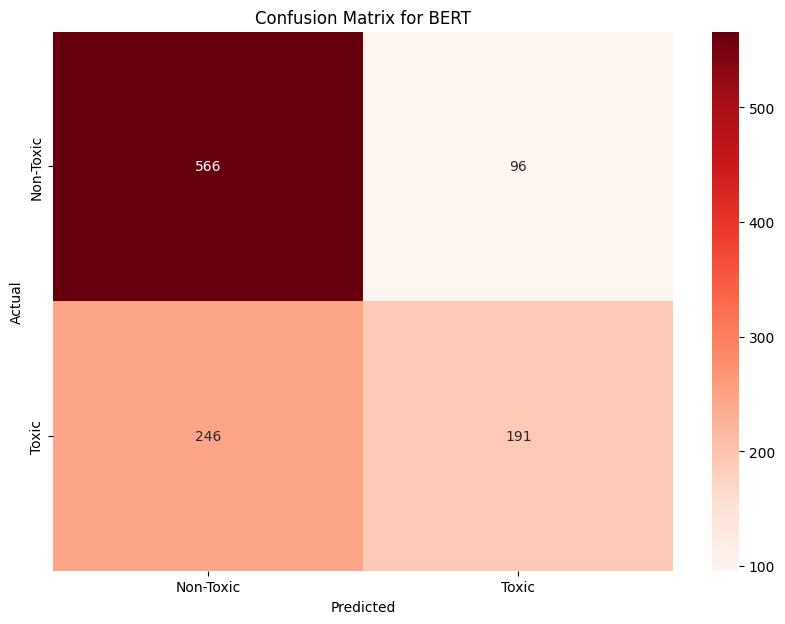

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


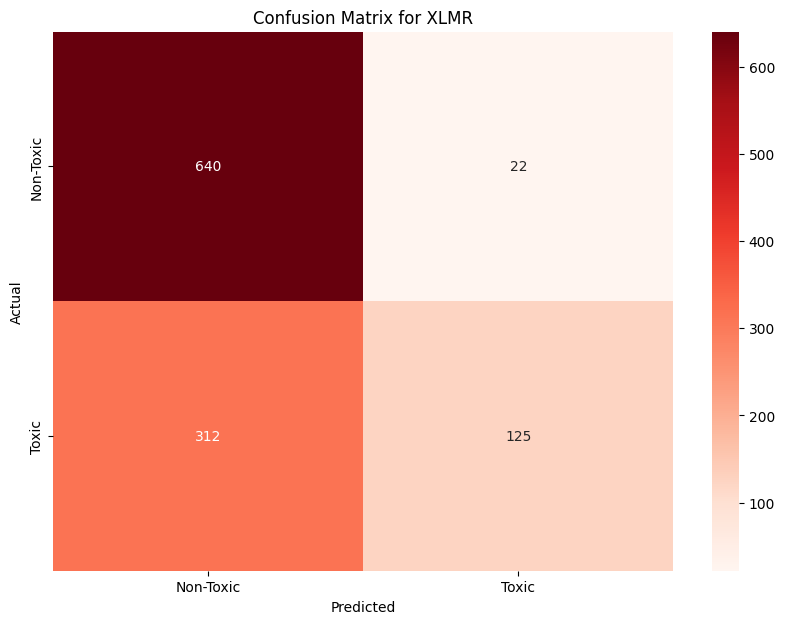

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


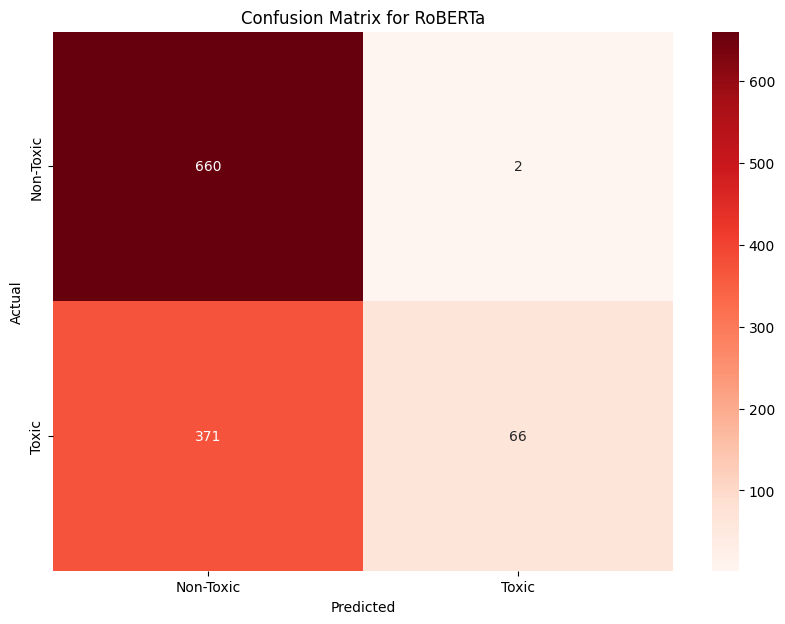

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


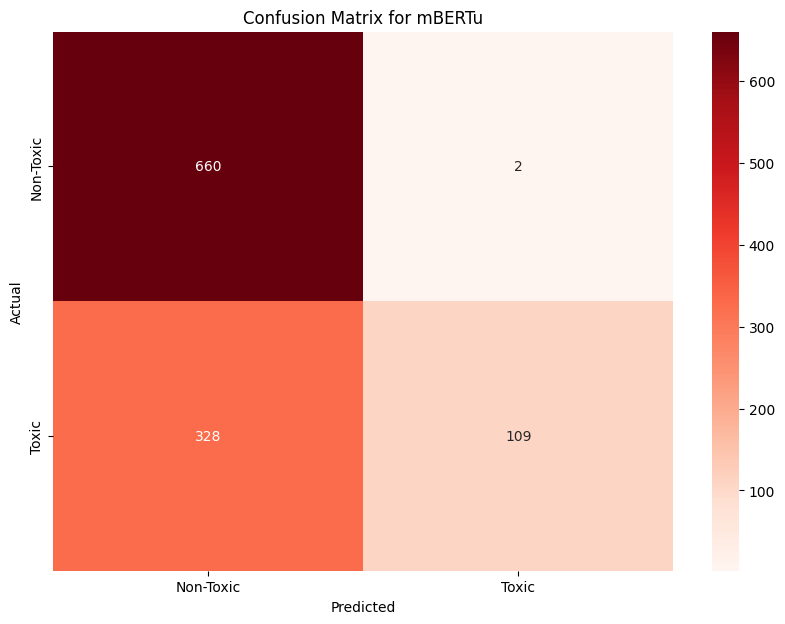

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


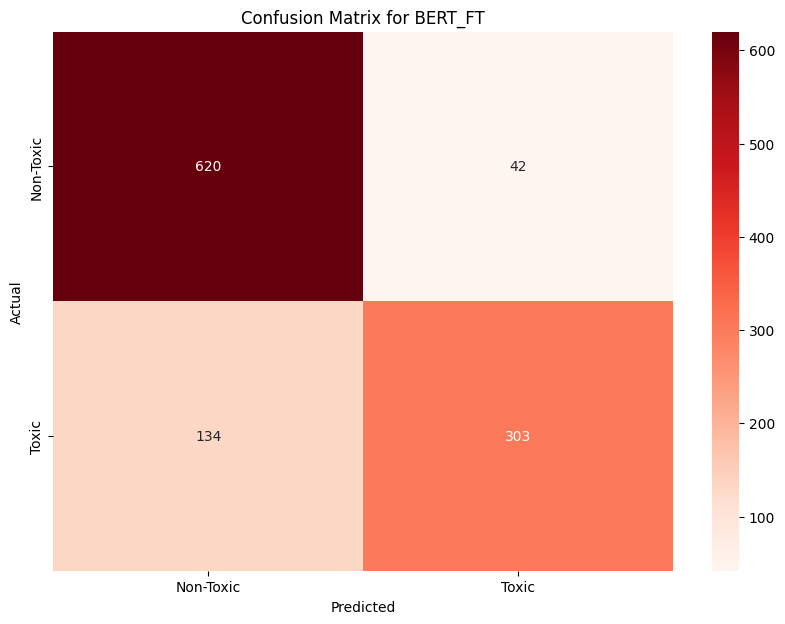

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


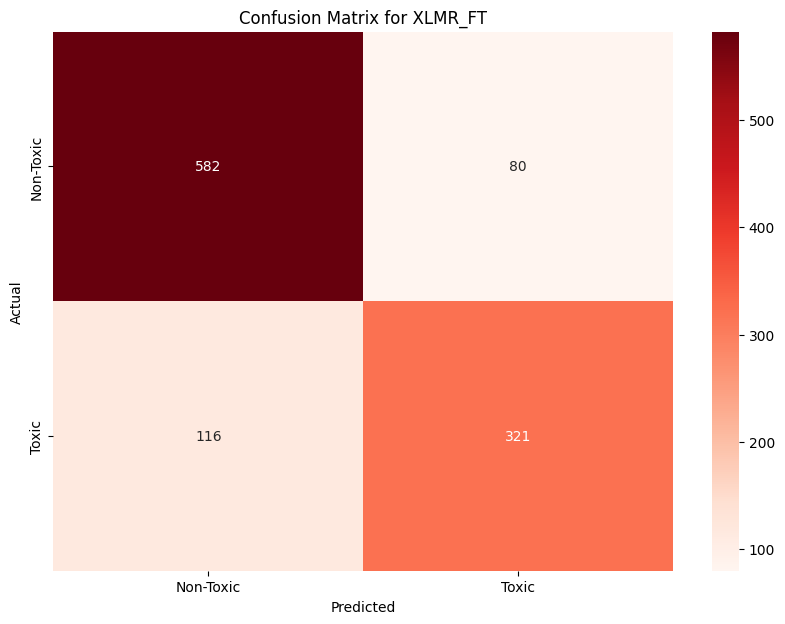

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


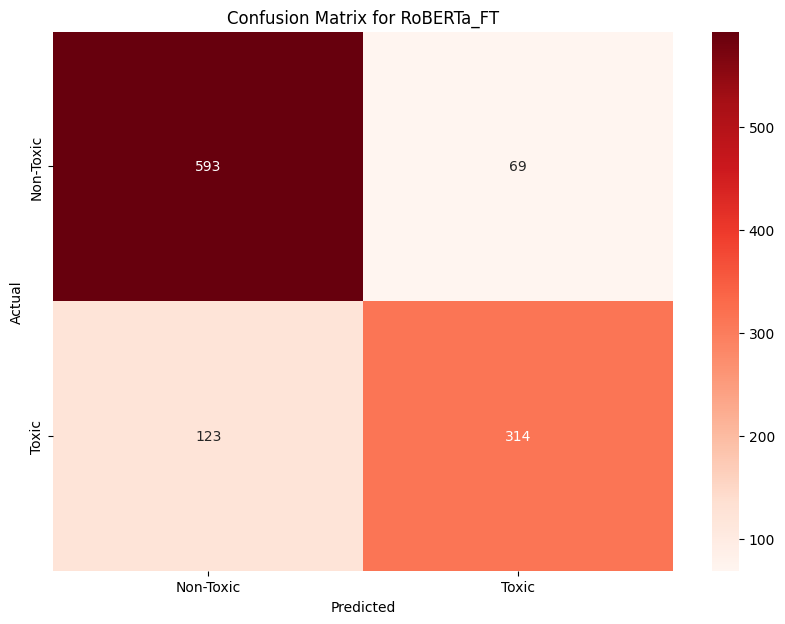

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


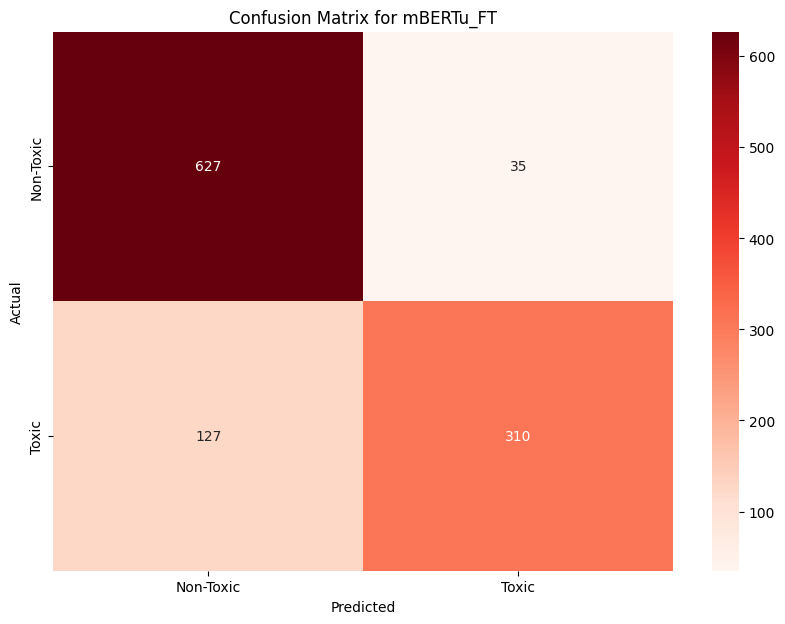

,Model,Accuracy,F1 Score,Precision,Recall,MCC
0,BERT,0.69,0.67,0.68,0.69,0.33
1,XLMR,0.70,0.65,0.74,0.70,0.36
2,RoBERTa,0.66,0.57,0.77,0.66,0.30
3,mBERTu,0.70,0.64,0.79,0.70,0.40
4,BERT_FT,0.84,0.84,0.84,0.84,0.66
5,XLMR_FT,0.82,0.82,0.82,0.82,0.62
6,RoBERTa_FT,0.83,0.82,0.82,0.83,0.63
7,mBERTu_FT,0.85,0.85,0.86,0.85,0.69


Model: BERT
Accuracy: 0.69
F1 Score: 0.67
Precision: 0.68
Recall: 0.69
MCC: 0.33

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.70      0.85      0.77       662
       Toxic       0.67      0.44      0.53       437

    accuracy                           0.69      1099
   macro avg       0.68      0.65      0.65      1099
weighted avg       0.68      0.69      0.67      1099



Model: XLMR
Accuracy: 0.70
F1 Score: 0.65
Precision: 0.74
Recall: 0.70
MCC: 0.36

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.67      0.97      0.79       662
       Toxic       0.85      0.29      0.43       437

    accuracy                           0.70      1099
   macro avg       0.76      0.63      0.61      1099
weighted avg       0.74      0.70      0.65      1099



Model: RoBERTa
Accuracy: 0.66
F1 Score: 0.57
Precision: 0.77
Recall: 0.66
MCC: 0.30

Classification Report:
               precisi

In [9]:
results = []

for model_name, model_path, model_base in models1:
    tokenizer, model = load_model_and_tokenizer(model_path, model_base)
    dataloader, labels = preprocess_data(tokenizer, dataset_path)
    accuracy, f1, precision, recall, mcc, class_report, cm = evaluate_model(dataloader, model)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall,
        'MCC': mcc,
        'Classification Report': class_report,
        'Confusion Matrix': cm
    })

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

def custom_round(value):
    rounded_value = round(value, 2)
    return rounded_value
    
# Round the values in the results list
for result in results:
    result['Accuracy'] = custom_round(result['Accuracy'])
    result['F1 Score'] = custom_round(result['F1 Score'])
    result['Precision'] = custom_round(result['Precision'])
    result['Recall'] = custom_round(result['Recall'])
    result['MCC'] = custom_round(result['MCC'])

# Display results
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'MCC'])
display(df_results)

# Print detailed classification reports for each model
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"MCC: {result['MCC']:.2f}")
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n" + "="*60 + "\n")
results = []

# Manual evaluation

In [2]:
import pandas as pd
import random

# Read the dataset and keep only the relevant columns
data = pd.read_csv('manualValDataset.csv', usecols=['Comment', 'isToxic'])

# Ensure there are no NaN values in the dataset
data.dropna(subset=['Comment', 'isToxic'], inplace=True)

# Ensure dataset has 50 toxic and 50 non-toxic comments
assert data['isToxic'].value_counts().min() >= 50

# Shuffle the dataset to ensure randomness
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Rename the column from 'Comment' to 'comment'
data.rename(columns={'Comment': 'comment'}, inplace=True)

# Save the dataset to a CSV file for use in the model evaluation
data.to_csv('cleaned_manually_labelled_dataset.csv', index=False)

# Separate toxic and non-toxic comments
toxic_comments = data[data['isToxic'] == 1]
non_toxic_comments = data[data['isToxic'] == 0]

# Define the subsets with varying ratios of toxic and non-toxic comments
subset_definitions = [
    (10, 10),  # Subset 1: 10 toxic and 10 non-toxic
    (15, 5),   # Subset 2: 15 toxic and 5 non-toxic
    (5, 15),   # Subset 3: 5 toxic and 15 non-toxic
    (20, 10),  # Subset 4: 20 toxic and 10 non-toxic
    (10, 20)   # Subset 5: 10 toxic and 20 non-toxic
]

In [3]:
subsets = ['./cleaned_manually_labelled_dataset.csv']  # Include the overall dataset as the first subset

In [4]:
for i, (n_toxic, n_non_toxic) in enumerate(subset_definitions, start=1):
    subset_toxic = toxic_comments.sample(n_toxic, random_state=i)
    subset_non_toxic = non_toxic_comments.sample(n_non_toxic, random_state=i)
    subset = pd.concat([subset_toxic, subset_non_toxic])
    subset.to_csv(f'./subset/subset{i}.csv', index=False)
    subsets.append(f'./subset/subset{i}.csv')

In [7]:
models1 = [
    ('mBERTu_FT', './models/Experiments/Validation/Experiment-2/mBERTu_FT', 'MLRS/mBERTu'),
]

results = []

for subset in subsets:
    for model_name, model_path, model_base in models1:
        tokenizer, model = load_model_and_tokenizer(model_path, model_base)
        dataloader, labels = preprocess_data(tokenizer, subset)
        accuracy, f1, precision, recall, mcc, class_report, cm = evaluate_model(dataloader, model)
        
        results.append({
            'Model': model_name,
            'Subset': subset,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision': precision,
            'Recall': recall,
            'MCC': mcc,
            'Classification Report': class_report,
            'Confusion Matrix': cm
        })

        # Plot confusion matrix
        # plt.figure(figsize=(10, 7))
        # sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=['Non-Toxic', 'Toxic'], yticklabels=['Non-Toxic', 'Toxic'])
        # plt.xlabel('Predicted')
        # plt.ylabel('Actual')
        # plt.title(f'Confusion Matrix for {model_name} on {subset}')
        # plt.show()

def custom_round(value):
    rounded_value = round(value, 2)
    return rounded_value
    
# Round the values in the results list
for result in results:
    result['Accuracy'] = custom_round(result['Accuracy'])
    result['F1 Score'] = custom_round(result['F1 Score'])
    result['Precision'] = custom_round(result['Precision'])
    result['Recall'] = custom_round(result['Recall'])
    result['MCC'] = custom_round(result['MCC'])

# Display results
df_results = pd.DataFrame(results, columns=['Model', 'Subset', 'Accuracy', 'F1 Score', 'Precision', 'Recall', 'MCC'])
display(df_results)

# Print detailed classification reports for each model
for result in results:
    print(f"Model: {result['Model']} on {result['Subset']}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"MCC: {result['MCC']:.2f}")
    print("\nClassification Report:\n", result['Classification Report'])
    print("\n" + "="*60 + "\n")

results = []

c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\Family-PC\miniconda3\envs\thesis\lib\site-packages\huggingface_hub\file_downloa

,Model,Subset,Accuracy,F1 Score,Precision,Recall,MCC
0,mBERTu_FT,./cleaned_manually_labelled_dataset.csv,0.85,0.85,0.85,0.85,0.70
1,mBERTu_FT,./subset/subset1.csv,0.90,0.90,0.92,0.90,0.82
2,mBERTu_FT,./subset/subset2.csv,0.90,0.90,0.93,0.90,0.79
3,mBERTu_FT,./subset/subset3.csv,0.90,0.90,0.93,0.90,0.79
4,mBERTu_FT,./subset/subset4.csv,0.83,0.84,0.86,0.83,0.67
5,mBERTu_FT,./subset/subset5.csv,0.83,0.84,0.89,0.83,0.71


Model: mBERTu_FT on ./cleaned_manually_labelled_dataset.csv
Accuracy: 0.85
F1 Score: 0.85
Precision: 0.85
Recall: 0.85
MCC: 0.70

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.83      0.88      0.85        50
       Toxic       0.87      0.82      0.85        50

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



Model: mBERTu_FT on ./subset/subset1.csv
Accuracy: 0.90
F1 Score: 0.90
Precision: 0.92
Recall: 0.90
MCC: 0.82

Classification Report:
               precision    recall  f1-score   support

   Non-Toxic       0.83      1.00      0.91        10
       Toxic       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



Model: mBERTu_FT on ./subset/subset2.csv
Accuracy: 0.